<a href="https://colab.research.google.com/github/spinosaphb/ufc-machine-learning/blob/main/activities/A3/knn_with_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import knn

In [28]:
path = 'https://raw.githubusercontent.com/spinosaphb/ufc-machine-learning/main/datasets/Iris.csv'
df = pd.read_csv(path)
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [4]:
reasonPetal = df['PetalLengthCm'] / df['PetalWidthCm']
df.drop(['PetalLengthCm', 'PetalWidthCm'], axis=1, inplace=True)
df.insert(2, 'PetalReason', reasonPetal)
df.head()

,SepalLengthCm,SepalWidthCm,PetalReason,Species
0,5.1,3.5,7.0,Iris-setosa
1,4.9,3.0,7.0,Iris-setosa
2,4.7,3.2,6.5,Iris-setosa
3,4.6,3.1,7.5,Iris-setosa
4,5.0,3.6,7.0,Iris-setosa


In [5]:
labelspecies = df['Species'].unique()
species = {
    labelspecies[0] : 0,
    labelspecies[1] : 1,
    labelspecies[2] : 2
}
df['Species'].replace(species, inplace=True)

In [6]:
dfs = df.sample(frac=1, random_state=42)
X = np.array(dfs.iloc[:,:3])
y = np.array(dfs['Species'])
XBySpecies = {
    'setosa'     : X[y == 0],
    'versicolor' : X[y == 1],
    'virginica'  : X[y == 2]  
}
YBySpecies = {
    'setosa' :  y[y == 0],
    'versicolor' :  y[y == 1],
    'virginica' :  y[y == 2]
}


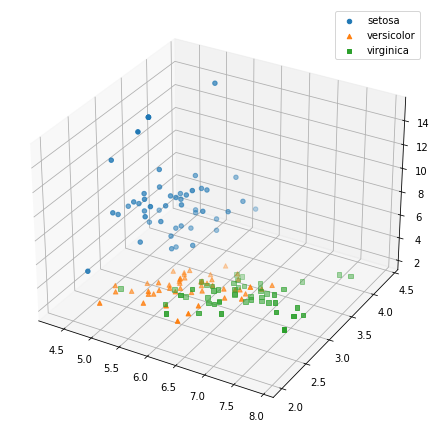

In [7]:

ax = plt.figure(figsize=[6.4*1.6, 4.8*1.6]).add_subplot(projection='3d')

list_tuples = [('setosa', 'o'),
               ('versicolor', '^'),
               ('virginica', 's')]
scts = []
for i, m in list_tuples:
    specie = XBySpecies[i]
    scts.append(ax.scatter(specie[:,0], specie[:,1],
                            specie[:,2], marker=m))    
ax.legend(scts, XBySpecies);

In [8]:
keys = XBySpecies.keys()
X_train, X_test, y_train, y_test = ([],[],[],[]) 
percent = 0
for key in keys:
    percent = int( len(XBySpecies[key]) * 0.7 )
    # estratifying to x
    X_train = X_train + XBySpecies[key][:percent,:].tolist()
    X_test  = X_test  + XBySpecies[key][percent:,:].tolist()
    # stratifying to y
    y_train = y_train + YBySpecies[key][:percent].tolist()
    y_test  = y_test + YBySpecies[key][percent:].tolist()
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
y_pred3k = []
for test in X_test:
    y_pred3k.append( knn.predict_classification(X, y, test, 3) )
y_pred5k = []
for test in X_test:
    y_pred5k.append( knn.predict_classification(X, y, test, 5) )

idx_sort:[ 96  68 102], output_values:[0 0 0], prediction:0
idx_sort:[ 97  61 144], output_values:[0 0 0], prediction:0
idx_sort:[100  87  68], output_values:[0 0 0], prediction:0
idx_sort:[101  58  57], output_values:[0 0 0], prediction:0
idx_sort:[102  34 108], output_values:[0 0 0], prediction:0
idx_sort:[105  30  28], output_values:[0 0 0], prediction:0
idx_sort:[108  34 102], output_values:[0 0 0], prediction:0
idx_sort:[114  33 124], output_values:[0 0 0], prediction:0
idx_sort:[121  28  59], output_values:[0 0 1], prediction:0
idx_sort:[124  44  37], output_values:[0 0 0], prediction:0
idx_sort:[128  22   5], output_values:[0 0 0], prediction:0
idx_sort:[ 85  13 132], output_values:[0 0 0], prediction:0
idx_sort:[134  81  68], output_values:[0 0 0], prediction:0
idx_sort:[144 114  62], output_values:[0 0 0], prediction:0
idx_sort:[147   1  12], output_values:[0 0 0], prediction:0
idx_sort:[112 135  99], output_values:[1 1 2], prediction:1
idx_sort:[116 143  72], output_values:[1

In [25]:
hits3k = np.sum(y_test == y_pred3k)
accuracy3k = hits3k/ len(y_test) * 100
print(f'accuracy: {round(accuracy3k,2)}%')

accuracy: 93.33%


In [26]:
hits5k = np.sum(y_test == y_pred5k)
accuracy5k = hits5k/ len(y_test) * 100
print(f'accuracy: {round(accuracy5k,2)}%')

accuracy: 88.89%
